# Project 4 

In [157]:
import pandas as pd
import math
import random
from scipy.stats import beta
import numpy as np
import time
import matplotlib.pyplot as plt

## Problem 1 

In [9]:
"""
The problem formuation is such that, at each tim t, we are to recommend one category A_i to the user and observe the
reward for that category (r_i,t). We want to maximize the reward (the total number of clicks through all rounds), and such this
is a multi-bandit problem. As we are only allowed to present the user one category during each round, this is not a semi-bandit problem,
as we are not presenting the user with multiple categories in each round and building statistics on sets of categories. We are to build
the statistics of each category individually, and in an online fashion.
"""

'\nThe problem formuation is such that, at each tim t, we are to recommend one category A_i to the user and observe the\nreward for that category (r_i,t). We want to maximize the reward (the total number of clicks through all rounds), and such this\nis a multi-bandit problem. As we are only allowed to present the user one category during each round, this is not a semi-bandit problem,\nas we are not presenting the user with multiple categories in each round and building statistics on sets of categories. We are to build\nthe statistics of each category individually, and in an online fashion.\n'

In [2]:
#Import ad data
yahoo_data = pd.read_csv("yahoo_ad_clicks.csv",header=None)

In [3]:
categories_len = yahoo_data.shape[0]
rounds = yahoo_data.shape[1]

In [152]:
repeats = 100

## Problem 2 

In [4]:
"""
Two approached to the multi-bandit problem with partial feedback will be explored: 
- Implementation of the standard Benoulli Bandits approach for partial feedback
- EXP3 algorithm, as the update has an indicator function that only updates loss vector based on chosen index at each round
"""

'\nTwo approached to the multi-bandit problem with partial feedback will be explored: \n- Implementation of the standard Benoulli Bandits approach for partial feedback\n- EXP3 algorithm, as the update has an indicator function that only updates loss vector based on chosen index at each round\n'

In [153]:
#Now, will explore EXP3 in a partial feedback setting. Instead of reward, loss = 1 if r_i,t = 0.
eta = 1/np.sqrt(rounds)
data = np.array(yahoo_data)
exp3_avg_regret = 0
exp3_avg_success = 0

start = time.time()

for t in range(repeats):
    print('t:',t)
    running_loss = 0
    prob = 1/categories_len * np.ones(categories_len)
    exp3_success = 0
    exp3_fails = 0
    exp3_best_loss = 0
    exp3_loss = np.zeros(categories_len)
    for i in range(rounds):
        loss_update = np.zeros(categories_len)
        chosen_idx = np.random.choice(range(categories_len), p=prob)
        exp3_best_idx = np.argmax(prob)
        exp3_best_loss += (1-data[exp3_best_idx][i])
    
        if data[chosen_idx][i] == 1:
            loss = 0
            exp3_success += 1
        else:
            loss = 1
            exp3_fails += 1
        
        running_loss += loss
        loss_update[chosen_idx] = loss/prob[chosen_idx]
        exp3_loss += loss_update
    
        prob = [np.exp(-eta*exp3_loss[r]) for r in range(categories_len)]
        prob = prob/sum(prob)
        
    exp3_avg_regret += (1/repeats)*(running_loss - exp3_best_loss)
    exp3_avg_success += (1/repeats)*(exp3_success)
    print('its been ',(time.time() - start)/60, 'minutes')

print('EXP3 in partial feedback got avg ',exp3_avg_success,'successful rounds out of ',rounds)
print('Avg. Regret over ',repeats,'trials is:',exp3_avg_regret)

t: 0
its been  0.0638858437538147 minutes
t: 1
its been  0.12825833956400554 minutes
t: 2
its been  0.1870082934697469 minutes
t: 3
its been  0.2436279296875 minutes
t: 4
its been  0.3012129227320353 minutes
t: 5
its been  0.36066593329111735 minutes
t: 6
its been  0.4212447802225749 minutes
t: 7
its been  0.48692257404327394 minutes
t: 8
its been  0.5517752329508464 minutes
t: 9
its been  0.6163130164146423 minutes
t: 10
its been  0.6805862426757813 minutes
t: 11
its been  0.743826150894165 minutes
t: 12
its been  0.8070074955622355 minutes
t: 13
its been  0.8690991640090943 minutes
t: 14
its been  0.932883886496226 minutes
t: 15
its been  0.9958765745162964 minutes
t: 16
its been  1.0592479745546977 minutes
t: 17
its been  1.1215372522672018 minutes
t: 18
its been  1.1847696026166281 minutes
t: 19
its been  1.2475871960322062 minutes
t: 20
its been  1.310852587223053 minutes
t: 21
its been  1.373786747455597 minutes
t: 22
its been  1.4371919234593709 minutes
t: 23
its been  1.4986869

In [163]:
#Now, will explore EXP3++, set parameters eta = 1/sqrt(rounds),upsilon = 0, upsilon update += e[chosen_idx]
eta = 1/np.sqrt(rounds)
data = np.array(yahoo_data)
exp3p_avg_regret = 0
exp3p_avg_success = 0

start = time.time()

for t in range(repeats):
    print('t:',t)
    exp3p_success = 0
    exp3p_fails = 0
    exp3p_regret = 0
    exp3p_loss = np.zeros(categories_len)
    exp3p_best_loss = 0
    upsilon = np.zeros(categories_len)
    n = np.ones(categories_len)
    running_loss = 0
    prob = 1/categories_len * np.ones(categories_len)
    for i in range(rounds):
        loss_update = np.zeros(categories_len)
        beta = 0.5*np.sqrt(np.log(rounds)/((i+1)*rounds))
    
        e = [np.min([(1/(2*rounds)),beta,upsilon[r]]) for r in range(categories_len)]
        prob = [np.exp(-eta*exp3_loss[r]) for r in range(categories_len)]
        prob = prob/sum(prob)
        const = (1-sum(e))
        prob1 = [const*prob[r]+e[r] for r in range(categories_len)]
    
        chosen_idx = np.random.choice(range(categories_len), p=prob1)
        best_idx = np.argmax(prob1)
    
        exp3p_best_loss += (1-data[best_idx][i])
    
    
        if data[chosen_idx][i] == 1:
            loss = 0
            exp3p_success += 1
            upsilon[chosen_idx] +=  beta #np.exp(-eta*i)
        else:
            loss = 1
            exp3p_fails += 1
        running_loss += loss
        loss_update[chosen_idx] = loss/prob[chosen_idx]
        exp3p_loss += loss_update
        
    exp3p_avg_regret += (1/repeats)*(running_loss - exp3p_best_loss)
    exp3p_avg_success += (1/repeats)*exp3p_success
    print('its been ',(time.time() - start)/60, 'minutes')
    
print('EXP3++ in partial feedback got avg ',exp3p_avg_success,'successful rounds out of ',rounds)
print('Avg. Regret over ',repeats,'trials is:',exp3_avg_regret)

t: 0
its been  0.4795909285545349 minutes
t: 1
its been  0.930222753683726 minutes
t: 2
its been  1.12736519575119 minutes
t: 3
its been  1.484958299001058 minutes
t: 4
its been  1.7083481947580974 minutes
t: 5
its been  1.9300350507100423 minutes
t: 6
its been  2.1505308707555133 minutes
t: 7
its been  2.37011874516805 minutes
t: 8
its been  2.586398545900981 minutes
t: 9
its been  2.806879250208537 minutes
t: 10
its been  3.0246553500493367 minutes
t: 11
its been  3.2411680221557617 minutes
t: 12
its been  3.460233716169993 minutes
t: 13
its been  3.677102224032084 minutes
t: 14
its been  3.897201605637868 minutes
t: 15
its been  4.117044321695963 minutes
t: 16
its been  4.335647793610891 minutes
t: 17
its been  4.553441115220388 minutes
t: 18
its been  4.780601191520691 minutes
t: 19
its been  5.0006341179211935 minutes
t: 20
its been  5.21775856812795 minutes
t: 21
its been  5.439825721581777 minutes
t: 22
its been  5.6651916146278385 minutes
t: 23
its been  5.882728334267934 minut

In [161]:
#Now, will explore EXP3++, set parameters upsilon = 0
eta = 1/np.sqrt(rounds)
data = np.array(yahoo_data)
exp3p_success = 0
exp3p_fails = 0
exp3p_regret = 0
exp3p_loss = np.zeros(categories_len)
exp3p_best_loss = 0
upsilon = np.zeros(categories_len)
n = np.ones(categories_len)
running_loss = 0
prob = 1/categories_len * np.ones(categories_len)
for i in range(rounds):
    loss_update = np.zeros(categories_len)
    beta = 0.5*np.sqrt(np.log(rounds)/((i+1)*rounds))
    
    e = [np.min([(1/(2*rounds)),beta,upsilon[r]]) for r in range(categories_len)]
    prob = [np.exp(-eta*exp3_loss[r]) for r in range(categories_len)]
    prob = prob/sum(prob)
    const = (1-sum(e))
    prob1 = [const*prob[r]+e[r] for r in range(categories_len)]
    
    chosen_idx = np.random.choice(range(categories_len), p=prob1)
    best_idx = np.argmax(prob1)
    
    exp3p_best_loss += (1-data[best_idx][i])
    
    
    if data[chosen_idx][i] == 1:
        loss = 0
        exp3p_success += 1
        upsilon[chosen_idx] += e[chosen_idx]#beta 
    else:
        loss = 1
        exp3p_fails += 1
    running_loss += loss
    loss_update[chosen_idx] = loss/prob[chosen_idx]
    exp3p_loss += loss_update
        
print('Regret: ',running_loss - exp3p_best_loss)

Regret:  773


## Problem 3 

In [155]:
#Now, will explore Mult. Weight Update  in a full feedback setting. Instead of reward, loss = 1 if r_i,t = 0.
eta = 1/np.sqrt(rounds)
data = np.array(yahoo_data)
mw_avg_regret = 0
mw_avg_success = 0

start = time.time()

for t in range(repeats):
    print('t:',t)
    mw_success = 0
    mw_fails = 0
    mw_best_loss = 0
    mw_loss = np.zeros(categories_len)
    running_loss = 0
    prob = 1/categories_len * np.ones(categories_len)
    for i in range(rounds):
        #loss_update = np.zeros(categories_len)
        chosen_idx = np.random.choice(range(categories_len), p=prob)
        mw_best_idx = np.argmax(prob)
        mw_best_loss += (1-data[mw_best_idx][i])
    
        if data[chosen_idx][i] == 1:
            loss = 0
            mw_success += 1
        else:
            loss = 1
            mw_fails += 1
        running_loss += loss
        #loss_update[chosen_idx] = loss/prob[chosen_idx]
        loss_update = [(1-data[r][i]) for r in range(categories_len)]
    
        prob = [prob[r]*(1-eta*loss_update[r]) for r in range(categories_len)]
        prob = prob/sum(prob)
        
    mw_avg_regret += (1/repeats)*(running_loss - mw_best_loss)
    mw_avg_success += (1/repeats)*(mw_success)
    print('its been ',(time.time() - start)/60, 'minutes')
      

print('Mult. Weight Update in full feedback got avg ',mw_avg_success,'successful rounds out of ',rounds)
print('Avg. Regret over ',repeats,'trials is:',mw_avg_regret)

t: 0
its been  0.05419696569442749 minutes
t: 1
its been  0.10984797080357869 minutes
t: 2
its been  0.17074020703633627 minutes
t: 3
its been  0.22549784183502197 minutes
t: 4
its been  0.2794873674710592 minutes
t: 5
its been  0.33365876277287804 minutes
t: 6
its been  0.3916665593783061 minutes
t: 7
its been  0.4453082243601481 minutes
t: 8
its been  0.4994135061899821 minutes
t: 9
its been  0.5526755650838217 minutes
t: 10
its been  0.6064171115557353 minutes
t: 11
its been  0.6598196784655254 minutes
t: 12
its been  0.7135122934977214 minutes
t: 13
its been  0.7669233004252116 minutes
t: 14
its been  0.8199785908063253 minutes
t: 15
its been  0.8732234001159668 minutes
t: 16
its been  0.9266756057739258 minutes
t: 17
its been  0.9796070218086242 minutes
t: 18
its been  1.032489538192749 minutes
t: 19
its been  1.0855772614479064 minutes
t: 20
its been  1.1386830051740011 minutes
t: 21
its been  1.1912840445836386 minutes
t: 22
its been  1.2438100695610046 minutes
t: 23
its been  1

## Problem 4 

In [156]:
"""
Basic idea: have k-experts, which will be their own EXP3 algorithms that hold their own prob. distributions. 
Each round t, each expert chooses an index to recommend. We will take a book out of EXP4 algorithm, which is contextual bandits.
The k-expert recommendations will only be used to update their own distributions. The algorithm will sum the prob distributions
over all the experts for each arm and multiply by the algorithms own prob. distribution over the arms. The algorithm will then
sample this distribution to pick an arm to play that round and will incur a loss. That loss is wrapped up into a loss update
vector and the algorithms probability distribution will be updated according to EXP3. Loss update vectors are calculated for 
each of the experts as well and their own prob distributions are updated as well. 
"""
k = 10
eta = 1/np.sqrt(rounds)
cust_avg_regret = 0
cust_avg_success = 0

start = time.time()
for t in range(repeats):
    print('t:',t)
    #each expert holds it's own prob dist over the arms, initialze to uniform dist.
    k_prob_dist = [1/categories_len * np.ones(categories_len) for r in range(k)]

    #algorithms prob distribution over arms
    prob_dist = 1/categories_len * np.ones(categories_len)

    loss_overall = np.zeros(categories_len)
    exp_loss_overall = [np.zeros(categories_len) for r in range(k)]

    cust_success = 0
    cust_fails = 0
    running_loss = 0
    best_running_loss = 0
    for i in range(rounds):
        alg_loss_update = np.zeros(categories_len)
        exp_loss_update = [np.zeros(categories_len) for r in range(k)]
    
        new_prob = [prob_dist[r]*sum(np.array(k_prob_dist)[:,r]) for r in range(categories_len)]
        new_prob = new_prob/sum(new_prob)
    
        expert_chosen = list(map(lambda x: np.random.choice(range(categories_len), p=x),k_prob_dist))
        chosen_idx = np.random.choice(range(categories_len),p=new_prob)
        best_idx = np.argmax(new_prob)
        best_running_loss += 1-data[best_idx][i]
    
        if data[chosen_idx][i] == 1:
            loss = 0
            cust_success += 1
        else:
            loss = 1
            cust_fails += 1
        
        running_loss += loss
    
        #update algorithm
        alg_loss_update[chosen_idx] = loss/prob[chosen_idx]
        loss_overall += alg_loss_update
        prob_dist = [np.exp(-eta*loss_overall[r]) for r in range(categories_len)]
        prob_dist = prob/sum(prob_dist)
    
        #update experts
        expert_loss = [1-data[r][i] for r in expert_chosen]
        for a in range(k):
            exp_loss_update[a][expert_chosen[a]] = expert_loss[a]/k_prob_dist[a][expert_chosen[a]]
            exp_loss_overall[a] += exp_loss_update[a]
            k_prob_dist[a] = [np.exp(-eta*exp_loss_overall[a][r]) for r in range(categories_len)]
            k_prob_dist[a] = k_prob_dist[a]/sum(k_prob_dist[a])
        
    cust_avg_regret += (1/repeats)*(running_loss - best_running_loss)
    cust_avg_success += (1/repeats)*(cust_success)
    print('its been ',(time.time() - start)/60, 'minutes')
        
print('Custom Update in partial feedback got avg',cust_avg_success,'successful rounds out of ',rounds)
print('Avg. Regret over ',repeats,'trials is:',cust_avg_regret)

t: 0
its been  0.8593113382657369 minutes
t: 1
its been  1.8100257078806559 minutes
t: 2
its been  2.664162111282349 minutes
t: 3
its been  3.5173388520876565 minutes
t: 4
its been  4.37382157643636 minutes
t: 5
its been  5.23793592453003 minutes
t: 6
its been  6.110952663421631 minutes
t: 7
its been  6.964980943997701 minutes
t: 8
its been  7.819993619124094 minutes
t: 9
its been  8.676634120941163 minutes
t: 10
its been  9.57787319024404 minutes
t: 11
its been  10.433504474163055 minutes
t: 12
its been  11.38197155793508 minutes
t: 13
its been  12.325536064306895 minutes
t: 14
its been  13.184035845597585 minutes
t: 15
its been  14.259842443466187 minutes
t: 16
its been  15.189816665649413 minutes
t: 17
its been  16.042166034380596 minutes
t: 18
its been  16.98179635206858 minutes
t: 19
its been  17.90581834713618 minutes
t: 20
its been  18.817093034585316 minutes
t: 21
its been  19.74164422750473 minutes
t: 22
its been  20.665584993362426 minutes
t: 23
its been  21.515628695487976 m

In [158]:
"""
Examine how size of K affects regret 
"""
k_list = [5,10,15,20]
k_regret = np.zeros(len(k_list))
eta = 1/np.sqrt(rounds)
cust_avg_regret = 0
cust_avg_success = 0

k_idx = 0
for k in k_list:
    
    #each expert holds it's own prob dist over the arms, initialze to uniform dist.
    k_prob_dist = [1/categories_len * np.ones(categories_len) for r in range(k)]

    #algorithms prob distribution over arms
    prob_dist = 1/categories_len * np.ones(categories_len)

    loss_overall = np.zeros(categories_len)
    exp_loss_overall = [np.zeros(categories_len) for r in range(k)]

    cust_success = 0
    cust_fails = 0
    running_loss = 0
    best_running_loss = 0
    for i in range(rounds):
        alg_loss_update = np.zeros(categories_len)
        exp_loss_update = [np.zeros(categories_len) for r in range(k)]
    
        new_prob = [prob_dist[r]*sum(np.array(k_prob_dist)[:,r]) for r in range(categories_len)]
        new_prob = new_prob/sum(new_prob)
    
        expert_chosen = list(map(lambda x: np.random.choice(range(categories_len), p=x),k_prob_dist))
        chosen_idx = np.random.choice(range(categories_len),p=new_prob)
        best_idx = np.argmax(new_prob)
        best_running_loss += 1-data[best_idx][i]
    
        if data[chosen_idx][i] == 1:
            loss = 0
            cust_success += 1
        else:
            loss = 1
            cust_fails += 1
        
        running_loss += loss
    
        #update algorithm
        alg_loss_update[chosen_idx] = loss/prob[chosen_idx]
        loss_overall += alg_loss_update
        prob_dist = [np.exp(-eta*loss_overall[r]) for r in range(categories_len)]
        prob_dist = prob/sum(prob_dist)
    
        #update experts
        expert_loss = [1-data[r][i] for r in expert_chosen]
        for a in range(k):
            exp_loss_update[a][expert_chosen[a]] = expert_loss[a]/k_prob_dist[a][expert_chosen[a]]
            exp_loss_overall[a] += exp_loss_update[a]
            k_prob_dist[a] = [np.exp(-eta*exp_loss_overall[a][r]) for r in range(categories_len)]
            k_prob_dist[a] = k_prob_dist[a]/sum(k_prob_dist[a])
        
    k_regret[k_idx] = running_loss - best_running_loss
    k_idx += 1


Text(0,0.5,'Regret')

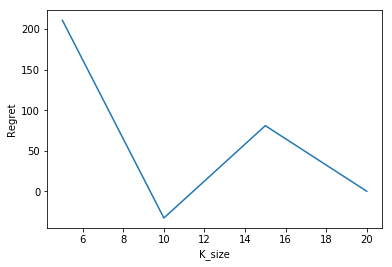

In [159]:
plt.plot(k_list,k_regret)
plt.xlabel('K_size')
plt.ylabel('Regret')

## Unused/Lower Performance Algorithms 

In [142]:
# Thompson Sampling/Bernoulli Bandits

data = np.array(yahoo_data)
avg_regret_thm = 0
avg_success_thm = 0

start = time.time()
for t in range(repeats):
    print('t:',t)
    success = np.zeros(categories_len)
    fails = np.zeros(categories_len)
    thm_best_reward = 0
    for i in range(rounds):
        S_t = success+1
        F_t = fails+1
        theta = beta_fcn(S_t,F_t)
        theta = theta/sum(theta)
        theta_max_idx = np.argmax(theta)
    
        chosen_idx = np.random.choice(range(categories_len), p=theta)
    
        if data[chosen_idx][i] == 1:
            success[chosen_idx] += 1
        else:
            fails[chosen_idx] += 1
        
        thm_best_reward += data[theta_max_idx][i]

    thm_success = sum(success)
    
    avg_regret_thm += (1/repeats)*(thm_best_reward - thm_success)
    avg_success_thm += (1/repeats)*(thm_success)
    print('its been ',(time.time()-start)/60,'minutes')

print('Thompson sampling got avg',avg_success_thm,'successful rounds out of ',rounds)
print('Avg. Regret over ',repeats,'trials is:',avg_regret_thm)

t: 0
its been  2.5092942357063293 minutes
Thompson sampling got avg 1413.0 successful rounds out of  32657
Avg. Regret over  1 trials is: -1168.0


In [9]:
def beta_fcn(S,F):
    x = np.linspace(0,1,num=categories_len)
    gamma0 = [math.factorial(S[i]-1) for i in range(len(S))]
    gamma1 = [math.factorial(F[i]-1) for i in range(len(F))]
    gamma01 = [math.factorial((S[i]+F[i])- 1) for i in range(len(S))]

    return [((gamma0[i]*gamma1[i])/gamma01[i])*(np.power(x[i],S[i]-1))*(np.power((1-x[i]),F[i]-1)) for i in range(len(x))]

In [93]:
#semi bandit
k = 10
eta = 1/np.sqrt(rounds)

sb_success = 0
sb_fails = 0
semi_band_success = np.zeros(k)
semi_band_fails = np.zeros(k)
semi_band_regret = np.zeros(k)
data = np.array(yahoo_data)
semi_band_k_loss = [np.zeros(categories_len) for r in range(k)]
semi_band_best_loss = 0
semi_band_running_loss = 0
semi_band_k_running_loss = np.zeros(k)

semi_band_prob = [1/categories_len * np.ones(categories_len) for r in range(k)]

"""
Idea is this: run k-diff MAB algorithms initially starting with unif. distr. each MAB_i will give a recommended
x_i category to choose for round t. Observe loss_i for each MAB_i. For first round, choose a random MAB_i to be the x_i that
incurs the running_loss_algo. After, the x_i recommendations from the other MAB_i are "revealed". Order the running_loss and 
update
top element (if necesary). For subsequent rounds, the running_loss_algo will incure loss from x_i_best (x_i from MAB_i on the 
top of the stack). Then the running loss_i for the rest of the MAB_i are revealed. if the running_loss_i for top element is 
still
better than the second element, keep using the top element. If not, reorder list to have a new top element to use for 
running_loss_algo
in the subsequent rounds. 

Technically this is partial feedback since we are only getting feedback from k of the categories we can choose from.
Uses submodulraity?
"""
start_k = np.random.choice(range(categories_len))
sorted_list = []
best_k = 0

for i in range(rounds):
    loss_update = [np.zeros(categories_len) for r in range(k)]
    if not i: #first round
        #for each of the k-elements, choose an index and find their loss
        chosen_idx = list(map(lambda x: np.random.choice(range(categories_len), p=x),semi_band_prob))
        semi_band_current_loss = list(map(lambda x: (1-data[x][i]),chosen_idx))
        
        #randomly choose one of the k to be the chosen element for the algorithm in this round
        chosen_k = np.random.choice(k)
        semi_band_running_loss += semi_band_current_loss[chosen_k]
        
        if not semi_band_current_loss[chosen_k]:
            sb_success += 1
        else:
            sb_fails += 1
        
        #calculate running loss for rest of k elements
        semi_band_k_running_loss = [semi_band_k_running_loss[r] + semi_band_k_running_loss[r] for r in range(k)]
        best_k = np.argmin(semi_band_k_running_loss)
        
        best_k_best = np.argmax(semi_band_prob[best_k])
        semi_band_best_loss += 1-data[best_k_best][i]
        
        #update the prob for each of the k 
        for r in range(k):
            loss_update[r][chosen_idx[r]] = semi_band_current_loss[r]/semi_band_prob[r][chosen_idx[r]]
            semi_band_k_loss[r] += loss_update[r]
            semi_band_prob[r] = [np.exp(-eta*semi_band_k_loss[r][q]) for q in range(categories_len)]
            semi_band_prob[r] = semi_band_prob[r]/sum(semi_band_prob[r])
    else:
        #for each of the k-elements, choose an index and find their loss
        chosen_idx = list(map(lambda x: np.random.choice(range(categories_len), p=x),semi_band_prob))
        semi_band_current_loss = list(map(lambda x: (1-data[x][i]),chosen_idx))
        
        semi_band_running_loss += semi_band_current_loss[best_k]
        
        if not semi_band_current_loss[best_k]:
            sb_success += 1
        else:
            sb_fails += 1
        
        #calculate running loss for rest of k elements
        semi_band_k_running_loss = [semi_band_k_running_loss[r] + semi_band_k_running_loss[r] for r in range(k)]
        best_k = np.argmin(semi_band_k_running_loss)
        
        best_k_best = np.argmax(semi_band_prob[best_k])
        semi_band_best_loss += 1-data[best_k_best][i]
        
        #update the prob for each of the k 
        for r in range(k):
            loss_update[r][chosen_idx[r]] = semi_band_current_loss[r]/semi_band_prob[r][chosen_idx[r]]
            semi_band_k_loss[r] += loss_update[r]
            semi_band_prob[r] = [np.exp(-eta*semi_band_k_loss[r][q]) for q in range(categories_len)]
            semi_band_prob[r] = semi_band_prob[r]/sum(semi_band_prob[r])
        
print('Semi-bandit Update in partial feedback got ',sb_success,'successful rounds out of ',rounds)
print('Regret is:',(semi_band_running_loss - semi_band_best_loss))

Semi-bandit Update in partial feedback got  11424 successful rounds out of  32657
Regret is: 1085
